In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [135]:
DAYS_PER_MONTH = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
N_MONTHS = 12

def pv_prod(capacity, years=1):
    """
    Normalised PV output distribution computed from monthly means in PVWatts file
    - Array indices = month (0 indexed), hour of day (0 indexed)
    """
    dist = np.array([
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.038, 0.126, 0.225, 0.251, 0.213, 0.119, 0.019, 0., 0.,0., 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.056,0.169, 0.277, 0.328, 0.336, 0.32 , 0.26 , 0.162, 0.041, 0.,0., 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0., 0.005, 0.068, 0.202, 0.333, 0.439, 0.504, 0.512, 0.455, 0.357, 0.234, 0.126, 0.024, 0., 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0.007, 0.057, 0.183, 0.333, 0.463, 0.549, 0.575, 0.543, 0.523, 0.451, 0.337, 0.214, 0.087, 0.015, 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0.005, 0.047, 0.126, 0.276, 0.438, 0.571, 0.655, 0.679, 0.646, 0.623, 0.54 , 0.414, 0.282, 0.143, 0.054, 0.009, 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0.015, 0.062, 0.138, 0.277, 0.426, 0.547, 0.65 , 0.709, 0.713, 0.669, 0.58 , 0.45 , 0.312, 0.177, 0.08 , 0.03 , 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0.007, 0.047, 0.112, 0.236, 0.377, 0.503, 0.612, 0.675, 0.671, 0.645, 0.571, 0.452, 0.32 , 0.179, 0.075, 0.025, 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0.016, 0.075, 0.205, 0.359, 0.483, 0.6 , 0.658, 0.658, 0.608, 0.51 , 0.373, 0.242, 0.113, 0.032, 0.003, 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0., 0.02 , 0.108, 0.226, 0.329, 0.422, 0.474, 0.477, 0.439, 0.363, 0.246, 0.13 , 0.033, 0.001, 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0., 0., 0.027, 0.138, 0.248, 0.34 , 0.385, 0.371, 0.35 , 0.255, 0.116, 0.019, 0., 0., 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.018, 0.111, 0.183, 0.223, 0.206, 0.18 , 0.092, 0.009, 0., 0., 0., 0., 0., 0., 0., 0. ],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.054, 0.141, 0.205, 0.19 , 0.152, 0.058, 0., 0., 0., 0., 0., 0., 0., 0., 0. ]
    ])
    day_prod = np.array([
        dist[month] * capacity
        for month
        in range(N_MONTHS)
    ])
    hourly_prod = np.concatenate([
        np.tile(day_prod[month], DAYS_PER_MONTH[month]) 
        for month in range(N_MONTHS)
    ])
    return np.tile(hourly_prod, years)
    

def wind_prod(capacity, years=1, noise=0.0):
    """
    Normalised PV output distribution computed from monthly means in PVWatts file
    - Array indices = month (0 indexed), hour of day (0 indexed)
    """
    # monthly wind
    wind_2018 = np.array([319,214,275,276,177,174,139,193,291,330,246,339])
    wind_2019 = np.array([345,298,400,228,276,182,223,153,311,275,246,344])
    wind_2020 = np.array([394,471,299,238,240,181,236,133,168,294,327,275])
    wind_2021 = np.array([267,301,326,363,340,224,298,391,321,503,469,520])
    monthly_wind = (wind_2018 + wind_2019 + wind_2020 + wind_2021)/4
    monthly_wind = monthly_wind / monthly_wind.max()
    
    hourly_wind = np.concatenate([
        np.tile(capacity*monthly_wind[month], 24*DAYS_PER_MONTH[month])
        for month in range(N_MONTHS)
    ])
    # add noise
    hourly_wind += np.random.normal(size=len(hourly_wind)) * noise
    return np.tile(np.clip(0, hourly_wind, capacity), years)


def demand_dist():
    """
    About:
    - Distribution follows nordpool spot prices
    - Array indices = hour of day
    """


def demand_by_hour(annual_demand, years=1):
    year_hours = 24*365
    mean_demand = annual_demand / year_hours
    dist = np.array([0.03529578, 0.03315591, 0.03214982, 0.03167976, 0.03195537,
       0.0342873 , 0.04257203, 0.0500294 , 0.0525266 , 0.04836528,
       0.04389886, 0.04096723, 0.03785774, 0.03547746, 0.0345392 ,
       0.03643008, 0.04011653, 0.0476938 , 0.05329773, 0.05576439,
       0.05228627, 0.04783387, 0.0438787 , 0.0379409 ])

    return np.tile(np.concatenate([dist for _ in range(365)]) * mean_demand * 24, years)


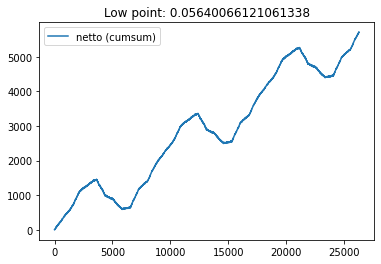

In [139]:
pv_cap = 3
wind_cap = 5
years=3

demand = demand_by_hour(annual_demand=34_300, years=years)
prod = pv_prod(pv_cap, years=years) + wind_prod(wind_cap, years=years, noise=1.2)
netto = prod - demand
netto_cumsum = netto.cumsum()
           
#plt.plot(demand, label='demand')
#plt.plot(prod, label='prod')
#plt.plot(netto, label='netto')
plt.plot(netto_cumsum, label='netto (cumsum)')
plt.legend()
plt.title(f'Low point: {netto_cumsum.min()}')
plt.show()


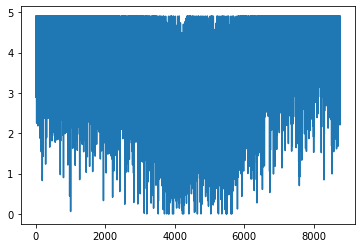

In [98]:
plt.plot(wind_prod(wind_cap, noise=1.2))